Author: Zehao Li
    
UNI: zl3667
    
Date: 12/14/2025
    
Course: EECS E4040 - Deep Learning & Neural Networks

Note: We wrote this code ourselves, except where we have clearly mentioned references or collaborations.

References :
A. Trockman and J. Z. Kolter, “Patches are all you need?,” arXiv preprint, arXiv:2201.09792, 2022.

# Baseline CNN Training

This notebook tests our training framework with a simple CNN before implementing ConvMixer.

**Purpose**: Verify that the training loop, data loading, and evaluation work correctly.

In [2]:
pip install tqdm

     |████████████████████████████████| 78 kB 6.0 MB/s             
Note: you may need to restart the kernel to use updated packages.


In [3]:
import sys
sys.path.append('..')

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from src.train_utils import SimpleCNN, train_model

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

PyTorch version: 1.10.1+cu102
CUDA available: True
Using device: cuda


## 1. Load CIFAR-10 Data

In [4]:
# Basic transforms
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

print(f"Training batches: {len(trainloader)}")
print(f"Test batches: {len(testloader)}")

Files already downloaded and verified
Files already downloaded and verified
Training batches: 782
Test batches: 100


## 2. Create Simple CNN Model

In [5]:
# Create simple CNN baseline
model = SimpleCNN(num_classes=10)

# Print model structure
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters()):,}")

SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=10, bias=True)
  )
)

Total parameters: 620,362


In [6]:
# Test forward pass
x = torch.randn(2, 3, 32, 32)
y = model(x)
print(f"Input shape: {x.shape}")
print(f"Output shape: {y.shape}")

Input shape: torch.Size([2, 3, 32, 32])
Output shape: torch.Size([2, 10])


## 3. Train the Model

In [7]:
# Train for a few epochs to verify everything works
history = train_model(
    model=model,
    trainloader=trainloader,
    testloader=testloader,
    epochs=10,  # Quick test, increase for better results
    lr=0.001,
    device=device
)

Training on cuda
Total parameters: 620,362

Epoch 1/10


Training: 100%|██████████| 782/782 [00:17<00:00, 44.93it/s, loss=1.3944, acc=44.92%]


Train Loss: 1.5072, Train Acc: 44.92%
Test Loss: 1.1325, Test Acc: 59.13%

Epoch 2/10


Training: 100%|██████████| 782/782 [00:17<00:00, 45.11it/s, loss=0.8324, acc=60.45%]


Train Loss: 1.1117, Train Acc: 60.45%
Test Loss: 0.9458, Test Acc: 66.65%

Epoch 3/10


Training: 100%|██████████| 782/782 [00:17<00:00, 45.01it/s, loss=0.6021, acc=66.45%]


Train Loss: 0.9443, Train Acc: 66.45%
Test Loss: 0.8101, Test Acc: 72.04%

Epoch 4/10


Training: 100%|██████████| 782/782 [00:17<00:00, 44.84it/s, loss=1.0017, acc=70.33%]


Train Loss: 0.8477, Train Acc: 70.33%
Test Loss: 0.7583, Test Acc: 73.72%

Epoch 5/10


Training: 100%|██████████| 782/782 [00:17<00:00, 44.45it/s, loss=0.7188, acc=72.70%]


Train Loss: 0.7818, Train Acc: 72.70%
Test Loss: 0.7173, Test Acc: 75.20%

Epoch 6/10


Training: 100%|██████████| 782/782 [00:17<00:00, 44.20it/s, loss=0.7888, acc=74.39%]


Train Loss: 0.7303, Train Acc: 74.39%
Test Loss: 0.7041, Test Acc: 76.15%

Epoch 7/10


Training: 100%|██████████| 782/782 [00:17<00:00, 45.30it/s, loss=0.3953, acc=75.79%]


Train Loss: 0.6893, Train Acc: 75.79%
Test Loss: 0.6701, Test Acc: 76.60%

Epoch 8/10


Training: 100%|██████████| 782/782 [00:17<00:00, 44.58it/s, loss=0.5854, acc=77.02%]


Train Loss: 0.6598, Train Acc: 77.02%
Test Loss: 0.6501, Test Acc: 77.37%

Epoch 9/10


Training: 100%|██████████| 782/782 [00:17<00:00, 45.01it/s, loss=0.4216, acc=77.66%]


Train Loss: 0.6351, Train Acc: 77.66%
Test Loss: 0.7056, Test Acc: 76.24%

Epoch 10/10


Training: 100%|██████████| 782/782 [00:17<00:00, 44.43it/s, loss=0.6161, acc=78.78%]


Train Loss: 0.6102, Train Acc: 78.78%
Test Loss: 0.6096, Test Acc: 79.29%

Training completed in 3.27 minutes
Best Test Accuracy: 79.29%


## 4. Plot Training Curves

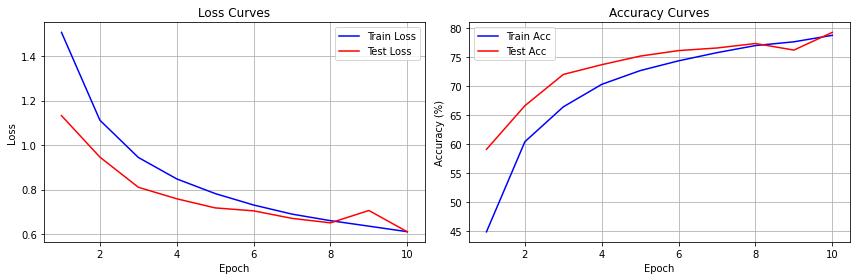


Best Test Accuracy: 79.29%


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

epochs = range(1, len(history['train_loss']) + 1)

# Loss
axes[0].plot(epochs, history['train_loss'], 'b-', label='Train Loss')
axes[0].plot(epochs, history['test_loss'], 'r-', label='Test Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Curves')
axes[0].legend()
axes[0].grid(True)

# Accuracy
axes[1].plot(epochs, history['train_acc'], 'b-', label='Train Acc')
axes[1].plot(epochs, history['test_acc'], 'r-', label='Test Acc')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Accuracy Curves')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('../figures/baseline_cnn_training.png', dpi=150)
plt.show()

print(f"\nBest Test Accuracy: {max(history['test_acc']):.2f}%")

## Summary

- Training framework works correctly
- Data loading and augmentation functional
- Model training and evaluation verified
- Simple CNN achieves reasonable accuracy (~70-75% with 10 epochs)